In [60]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_csv('../../data/curated/AllProperties.csv')
df.loc[df['Suburb'] == 'Wanagaratta', 'Suburb'] = 'Wangaratta'

In [62]:
df.columns = df.columns.str.strip()

years = [2018, 2019, 2020, 2021, 2022, 2023]
df_weekly_rent = df[['Suburb']].copy()

for year in years:
    year_cols = [col for col in df.columns if col.startswith(str(year))]
    df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

    df_temp = df[year_cols].replace(0, np.nan)
    avg_without_zeros = df_temp.mean(axis=1, skipna=True)

    all_zero_mask = (df[year_cols] == 0).all(axis=1)
    column_name = f"{year}_weekly_rent"
    df_weekly_rent[column_name] = np.where(all_zero_mask, 0, avg_without_zeros)

df_weekly_rent

,Suburb,2018_weekly_rent,2019_weekly_rent,2020_weekly_rent,2021_weekly_rent,2022_weekly_rent,2023_weekly_rent
0,Albert Park-Middle Park-West St Kilda,737.375,720.875,702.750,711.250,684.375,665.5
1,Armadale,702.125,624.000,621.500,628.000,642.250,620.5
2,Carlton North,535.625,537.875,564.875,587.625,573.000,555.0
3,Carlton-Parkville,2418.875,2458.875,2663.875,2615.250,3372.250,3545.0
4,CBD-St Kilda Rd,5352.125,5629.750,6095.625,8814.125,9021.500,8963.0
...,...,...,...,...,...,...,...
141,Traralgon,691.375,621.500,594.375,593.750,633.500,644.0
142,Wangaratta,451.875,460.375,473.125,450.250,457.375,449.0
143,Warragul,398.875,420.625,465.875,459.750,465.250,468.5
144,Warrnambool,751.125,695.750,663.000,614.750,633.375,643.5


In [63]:
numeric_cols = df_weekly_rent.select_dtypes(include=['number']).columns
has_zeros = (df_weekly_rent[numeric_cols] == 0).any().any()

print(f"Does df_weekly_rent have any zero values? {has_zeros}")

Does df_weekly_rent have any zero values? False


In [64]:
df_new = df_weekly_rent.copy()

population_years = [2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026]
for year in population_years:
    
    # initialise population columns
    population_column_name = f"{year}_population"
    df_new[population_column_name] = 0
    
    # initialise income columns
    income_column_name = f"{year}_income"
    df_new[income_column_name] = 0.0

df_new

,Suburb,2018_weekly_rent,2019_weekly_rent,2020_weekly_rent,2021_weekly_rent,2022_weekly_rent,2023_weekly_rent,2018_population,2018_income,2019_population,...,2022_population,2022_income,2023_population,2023_income,2024_population,2024_income,2025_population,2025_income,2026_population,2026_income
0,Albert Park-Middle Park-West St Kilda,737.375,720.875,702.750,711.250,684.375,665.5,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,Armadale,702.125,624.000,621.500,628.000,642.250,620.5,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,Carlton North,535.625,537.875,564.875,587.625,573.000,555.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,Carlton-Parkville,2418.875,2458.875,2663.875,2615.250,3372.250,3545.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,CBD-St Kilda Rd,5352.125,5629.750,6095.625,8814.125,9021.500,8963.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Traralgon,691.375,621.500,594.375,593.750,633.500,644.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
142,Wangaratta,451.875,460.375,473.125,450.250,457.375,449.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
143,Warragul,398.875,420.625,465.875,459.750,465.250,468.5,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
144,Warrnambool,751.125,695.750,663.000,614.750,633.375,643.5,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [65]:
df_population = pd.read_csv('../../data/curated/population_by_sa2.csv')
df_income = pd.read_csv('../../data/curated/income_by_sa2.csv')

In [66]:
df_population

,Label,estimated_population_2018,estimated_population_2019,estimated_population_2020,estimated_population_2021,estimated_population_2022,estimated_population_2023,estimated_population_2024,estimated_population_2025,estimated_population_2026
0,Abbotsford,9527,9594,9672,9258,9513,10008,10527.676824,10914.578045,11189.069984
1,Airport West,8169,8390,8362,8240,8295,8464,8683.181491,8896.540332,9093.092637
2,Albert Park,16728,17081,16955,16011,16177,16861,17665.062455,18280.665009,18706.847174
3,Alexandra,6646,6687,6690,6771,6794,6836,6915.938566,7038.105197,7186.668076
4,Alfredton,13537,14434,15507,16841,18002,18997,19771.949269,20395.671019,20940.982750
...,...,...,...,...,...,...,...,...,...,...
512,Yarram,5437,5474,5545,5555,5588,5580,5594.979256,5653.608883,5754.511887
513,Yarraville,15991,16092,16068,15651,15661,16020,16523.217961,16987.482063,17369.407751
514,Yarrawonga,8297,8418,8508,8593,8727,8812,8901.992448,9023.455120,9184.454667
515,Yarriambiack,6639,6617,6583,6453,6376,6327,6344.344429,6418.401396,6530.575937


In [67]:
df_income

,Label,median_income_2016,median_income_2017,median_income_2018,median_income_2019,median_income_2020,median_income_2021,median_income_2022,median_income_2023,median_income_2024,median_income_2025,median_income_2026
0,Abbotsford,56001,56242,59923,61918,66091,69104.795585,71219.795864,74636.644356,77788.073345,80427.684311,83781.391430
1,Airport West,54708,56619,58350,60992,62920,65268.165154,68154.903250,70695.851426,73394.212934,76451.213723,79397.004301
2,Albert Park,64048,62922,64900,65880,68836,71758.449466,73918.640871,77000.919533,80239.921519,83055.592588,86331.495226
3,Alexandra,38251,39811,41230,42447,44033,46010.900933,47833.306333,49778.505143,51958.291329,54092.617842,56294.447393
4,Alfredton,49071,50119,52709,53765,55019,57905.793758,60042.535187,62020.613758,64882.959903,67482.620117,69928.862355
...,...,...,...,...,...,...,...,...,...,...,...,...
394,Yarram,40266,39960,42650,43228,44904,47529.419325,49053.429695,50953.269734,53495.237847,55533.119845,57691.004992
395,Yarraville,61906,63996,66465,69379,72428,75150.947880,78146.977115,81342.059481,84431.867671,87696.030832,91150.354200
396,Yarrawonga,40234,40400,41809,43914,45708,47484.605261,49661.654459,51747.588040,53812.175594,56123.344343,58452.379863
397,Yarriambiack,35901,37036,39000,42076,43823,45495.709284,47986.025739,49976.076330,51873.803656,54280.164801,56537.349739


In [68]:
with open('missing_suburbs.txt') as f:
    missing_suburbs = f.read().splitlines()

#### Add population and income data to new_df for each suburb

In [69]:
suburb_count = {}

for label in df_income.Label:
    if label in missing_suburbs:
        continue
    found = False
    for suburb in df_weekly_rent.Suburb.values:
        if label == 'Carlton' and suburb == 'Carlton-Parkville' or \
        label == 'Keilor' and suburb == 'Keilor' or \
        label == 'Pascoe Vale' and suburb == 'Pascoe Vale-Coburg North' or \
        label == 'Bendigo Surrounds - North' and suburb == 'North Bendigo' or \
        label == 'East Bendigo - Kennington' and suburb == 'Flora Hill-Bendigo East' or \
        label == 'Brunswick East' and suburb == 'East Brunswick' or \
        label == 'Brunswick West' and suburb == 'West Brunswick' or \
        label == 'Carlton North - Princes Hill' and suburb == 'Carlton North' or \
        label == 'Dandenong - North' and suburb == 'Dandenong North-Endeavour Hills' or \
        label == 'Dandenong - South' and suburb == 'Dandenong' or \
        label == 'Gladstone Park - Westmeadows' and suburb == 'Gladstone Park-Tullamarine' or \
        label == 'Hawthorn East' and suburb == 'East Hawthorn' or \
        label == 'Highett (West) - Cheltenham' and suburb == 'Cheltenham' or \
        label == 'Ivanhoe East - Eaglemont' and suburb == 'Ivanhoe-Ivanhoe East' or \
        label == 'North Geelong - Bell Park' and suburb == 'North Geelong' or \
        label == 'Research - North Warrandyte' and suburb == 'Eltham-Research-Montmorency' or \
        label == 'Geelong West - Hamlyn Heights' and suburb == 'Herne Hill-Geelong West' or \
        label == 'St Kilda - Central' and suburb == 'St Kilda' or \
        label == 'St Kilda - West' and suburb == 'Albert Park-Middle Park-West St Kilda' or \
        label == 'St Kilda East' and suburb == 'East St Kilda' or \
        label == 'West Footscray - Tottenham' and suburb == 'West Footscray' or \
        'Berwick' in label and 'Berwick' in suburb or \
        'Bundoora' in label and 'Bundoora' in suburb or \
        'Clayton' in label and 'Clayton' in suburb or \
        'Craigieburn' in label and 'Craigieburn' in suburb or \
        'Croydon' in label and 'Croydon' in suburb or \
        'Doncaster East' in label and 'Doncaster East' in suburb or \
        'Endeavour Hills' in label and 'Endeavour Hills' in suburb or \
        'Epping' in label and 'Epping' in suburb or \
        'Essendon' in label and 'Essendon' in suburb or \
        'Ferntree Gully' in label and 'Ferntree Gully' in suburb or \
        'Glen Waverley' in label and 'Glen Waverley' in suburb or \
        'Glenroy' in label and 'Glenroy' in suburb or \
        'Hampton Park' in label and 'Hampton Park' in suburb or \
        'Hoppers Crossing' in label and 'Hoppers Crossing' in suburb or \
        'Kew' in label and 'Kew' in suburb or \
        'Lalor' in label and 'Lalor' in suburb or \
        'CBD' in label and 'CBD' in suburb or \
        'Mildura' in label and 'Mildura' in suburb or \
        'Mill Park' in label and 'Mill Park' in suburb or \
        'Mornington' in label and 'Mornington' in suburb or \
        'Mount Waverley' in label and 'Mount Waverley' in suburb or \
        'Narre Warren' in label and 'Narre Warren' in suburb or \
        'Noble Park' in label and 'Noble Park' in suburb or \
        'Northcote' in label and 'Northcote' in suburb or \
        'Pakenham' in label and 'Pakenham' in suburb or \
        'Preston' in label and 'Preston' in suburb or \
        'Reservoir' in label and 'Reservoir' in suburb or \
        'Richmond' in label and 'Richmond' in suburb or \
        'Rowville' in label and 'Rowville' in suburb or \
        'Roxburgh' in label and 'Roxburgh' in suburb or \
        'Shepparton' in label and 'Shepparton' in suburb or \
        'South Yarra' in label and 'South Yarra' in suburb or \
        'Southbank' in label and 'Southbank' in suburb or \
        'Albans' in label and 'Albans' in suburb or \
        'Surrey' in label and 'Surrey' in suburb or \
        'Traralgon' in label and 'Traralgon' in suburb or \
        'Warrnambool' in label and 'Warrnambool' in suburb or \
        'Werribee' in label and 'Werribee' in suburb or \
        'West Melbourne' in label and 'West Melbourne' in suburb or \
        label in suburb:
            found = True
            if suburb not in suburb_count:
                suburb_count[suburb] = 1
            else:
                suburb_count[suburb] += 1

            # population
            df_new.loc[df_new['Suburb'] == suburb, '2018_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2018'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2019_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2019'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2020_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2020'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2021_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2021'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2022_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2022'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2023_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2023'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2024_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2024'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2025_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2025'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2026_population'] += int(df_population.loc[df_population['Label'] == label, 'estimated_population_2026'].values[0])

            # income
            df_new.loc[df_new['Suburb'] == suburb, '2018_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2018'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2019_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2019'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2020_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2020'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2021_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2021'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2022_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2022'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2023_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2023'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2024_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2024'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2025_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2025'].values[0])
            df_new.loc[df_new['Suburb'] == suburb, '2026_income'] += float(df_income.loc[df_income['Label'] == label, 'median_income_2026'].values[0])

# average median income for suburbs with multiple SA2s
for suburb in suburb_count:
    if suburb_count[suburb] > 1:
        df_new.loc[df_new['Suburb'] == suburb, '2018_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2019_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2020_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2021_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2022_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2023_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2024_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2025_income'] /= suburb_count[suburb]
        df_new.loc[df_new['Suburb'] == suburb, '2026_income'] /= suburb_count[suburb]

In [70]:
df_new = df_new[['Suburb'] + sorted(df_new.columns.drop('Suburb'))]
df_new = df_new[(df_new != 0).all(axis=1)].reset_index(drop=True)
df_new

,Suburb,2018_income,2018_population,2018_weekly_rent,2019_income,2019_population,2019_weekly_rent,2020_income,2020_population,2020_weekly_rent,...,2022_weekly_rent,2023_income,2023_population,2023_weekly_rent,2024_income,2024_population,2025_income,2025_population,2026_income,2026_population
0,Albert Park-Middle Park-West St Kilda,64900.0,16728,737.375,65880.0,17081,720.875,68836.0,16955,702.750,...,684.375,77000.919533,16861,665.5,80239.921519,17665,83055.592588,18280,86331.495226,18706
1,Armadale,54967.0,88068,702.125,56826.0,91543,624.000,58437.0,94970,621.500,...,642.250,65683.276278,105094,620.5,68375.766886,109278,71182.773611,112809,73885.745371,115653
2,Carlton North,42734.0,29856,535.625,44478.0,30023,537.875,45719.0,29764,564.875,...,573.000,51984.610839,29907,555.0,54347.797245,33989,56697.186921,36749,58842.963958,38191
3,Carlton-Parkville,36430.0,29073,2418.875,38067.5,29320,2458.875,39423.5,29183,2663.875,...,3372.250,44963.336549,29379,3545.0,46995.465668,33560,49058.375695,36333,51037.141523,37753
4,Collingwood-Abbotsford,58927.0,19132,1167.375,61632.5,19423,1216.875,65350.5,19641,1247.750,...,1424.625,74098.375445,20493,1341.5,77227.321278,21871,80039.906008,22876,83265.756384,23537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Swan Hill,44315.0,11216,317.250,44968.0,11264,315.500,46302.0,11278,297.500,...,323.500,52329.444089,10948,309.5,54834.594779,10981,57008.054030,11116,59183.464765,11309
110,Torquay,51476.0,20996,538.875,53987.0,22149,571.500,56638.0,23346,617.875,...,569.000,63960.576298,26034,583.5,66465.777602,26513,69112.870416,27032,71952.240440,27607
111,Wangaratta,46215.0,19471,451.875,47975.0,19624,460.375,49282.0,19716,473.125,...,457.375,55697.461412,19969,449.0,58078.250055,20034,60562.584664,20227,62883.242556,20533
112,Warragul,46695.0,20501,398.875,48743.0,21283,420.625,50491.0,22099,465.875,...,465.250,57034.186426,24417,468.5,59355.658689,25003,61853.958165,25586,64319.407338,26163


# Model

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a stacked DataFrame similar to what you have done
years = ['2018', '2019', '2020', '2021', '2022', '2023']
stacked_df = pd.DataFrame()

for year in years:
    temp_df = df_new[['Suburb', f'{year}_income', f'{year}_population', f'{year}_weekly_rent']].copy()
    temp_df.columns = ['Suburb', 'income', 'population', 'weekly_rent']
    temp_df['year'] = int(year)
    stacked_df = pd.concat([stacked_df, temp_df])

# Sort by Suburb and year to ensure proper shifting
stacked_df = stacked_df.sort_values(by=['Suburb', 'year'])

# Create new columns for the previous year's data by shifting the values within each Suburb group
stacked_df['prev_year_income'] = stacked_df.groupby('Suburb')['income'].shift(1)
stacked_df['prev_year_population'] = stacked_df.groupby('Suburb')['population'].shift(1)
stacked_df['prev_year_weekly_rent'] = stacked_df.groupby('Suburb')['weekly_rent'].shift(1)

# Remove rows where 'year' == 2018, as they have NaN in the previous year columns
stacked_df_filtered = stacked_df[stacked_df['year'] != 2018]

# Now X includes these new features
X = stacked_df_filtered[['Suburb', 'income', 'population', 'year', 'prev_year_income', 'prev_year_population', 'prev_year_weekly_rent']]
y = stacked_df_filtered['weekly_rent']

# Continue with one-hot encoding for 'Suburb'
column_transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), ['Suburb'])
], remainder='passthrough')

X_encoded = column_transformer.fit_transform(X)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_encoded, y)

# Prepare features for 2024 with previous year's data (from 2023)
X_future_2024 = df_new[['Suburb', '2024_income', '2024_population']].copy()
X_future_2024.columns = ['Suburb', 'income', 'population']
# Use 2023 values for the previous year's data
X_future_2024.loc[:, 'prev_year_income'] = df_new['2023_income']
X_future_2024.loc[:, 'prev_year_population'] = df_new['2023_population']
X_future_2024.loc[:, 'prev_year_weekly_rent'] = df_new['2023_weekly_rent']
X_future_2024.loc[:, 'year'] = 2024

# Encode and predict for 2024
X_future_2024_encoded = column_transformer.transform(X_future_2024)
predictions_2024 = model.predict(X_future_2024_encoded)
df_new.loc[:, '2024_predicted_rent'] = predictions_2024

# Prepare features for 2025 with previous year's data (from 2024)
X_future_2025 = df_new[['Suburb', '2025_income', '2025_population']].copy()
X_future_2025.columns = ['Suburb', 'income', 'population']
# Use 2024 predicted values as the previous year's data
X_future_2025.loc[:, 'prev_year_income'] = df_new['2024_income']
X_future_2025.loc[:, 'prev_year_population'] = df_new['2024_population']
X_future_2025.loc[:, 'prev_year_weekly_rent'] = df_new['2024_predicted_rent']
X_future_2025.loc[:, 'year'] = 2025

# Encode and predict for 2025
X_future_2025_encoded = column_transformer.transform(X_future_2025)
predictions_2025 = model.predict(X_future_2025_encoded)
df_new.loc[:, '2025_predicted_rent'] = predictions_2025

# Prepare features for 2026 with previous year's data (from 2025)
X_future_2026 = df_new[['Suburb', '2026_income', '2026_population']].copy()
X_future_2026.columns = ['Suburb', 'income', 'population']
# Use 2025 predicted values as the previous year's data
X_future_2026.loc[:, 'prev_year_income'] = df_new['2025_income']
X_future_2026.loc[:, 'prev_year_population'] = df_new['2025_population']
X_future_2026.loc[:, 'prev_year_weekly_rent'] = df_new['2025_predicted_rent']
X_future_2026.loc[:, 'year'] = 2026

# Encode and predict for 2026
X_future_2026_encoded = column_transformer.transform(X_future_2026)
predictions_2026 = model.predict(X_future_2026_encoded)
df_new.loc[:, '2026_predicted_rent'] = predictions_2026

# Display the predictions
print(df_new[['Suburb', '2024_predicted_rent', '2025_predicted_rent', '2026_predicted_rent']])

                                    Suburb  2024_predicted_rent  \
0    Albert Park-Middle Park-West St Kilda           652.272033   
1                                 Armadale           608.592410   
2                            Carlton North           558.464035   
3                        Carlton-Parkville          3647.398413   
4                   Collingwood-Abbotsford          1351.738446   
..                                     ...                  ...   
109                              Swan Hill           305.541898   
110                                Torquay           574.840623   
111                             Wangaratta           444.177226   
112                               Warragul           462.297155   
113                            Warrnambool           644.638144   

     2025_predicted_rent  2026_predicted_rent  
0             631.590935           610.852329  
1             593.754289           574.031349  
2             558.489547           553.543023  
3  

In [86]:
stacked_df_filtered

,Suburb,income,population,weekly_rent,year,prev_year_income,prev_year_population,prev_year_weekly_rent
0,Albert Park-Middle Park-West St Kilda,65880.000000,17081,720.875,2019,64900.000000,16728.0,737.375
0,Albert Park-Middle Park-West St Kilda,68836.000000,16955,702.750,2020,65880.000000,17081.0,720.875
0,Albert Park-Middle Park-West St Kilda,71758.449466,16011,711.250,2021,68836.000000,16955.0,702.750
0,Albert Park-Middle Park-West St Kilda,73918.640871,16177,684.375,2022,71758.449466,16011.0,711.250
0,Albert Park-Middle Park-West St Kilda,77000.919533,16861,665.500,2023,73918.640871,16177.0,684.375
...,...,...,...,...,...,...,...,...
47,Yarraville-Seddon,69379.000000,16092,874.875,2019,66465.000000,15991.0,869.625
47,Yarraville-Seddon,72428.000000,16068,879.375,2020,69379.000000,16092.0,874.875
47,Yarraville-Seddon,75150.947880,15651,898.875,2021,72428.000000,16068.0,879.375
47,Yarraville-Seddon,78146.977115,15661,932.250,2022,75150.947880,15651.0,898.875


#### Top 10 suburbs with highest rental price growth 2023-2026

In [87]:
df_new['rent_growth_2023-2026_(%)'] = (df_new['2026_predicted_rent'] - df_new['2023_weekly_rent']) / df_new['2023_weekly_rent'] * 100
top_10_growth = df_new[['Suburb', '2023_weekly_rent', '2026_predicted_rent', 'rent_growth_2023-2026_(%)']].sort_values(by='rent_growth_2023-2026_(%)', ascending=False).head(10)
top_10_growth

,Suburb,2023_weekly_rent,2026_predicted_rent,rent_growth_2023-2026_(%)
3,Carlton-Parkville,3545.0,3852.392581,8.671159
44,Werribee-Hoppers Crossing,4627.0,4987.877279,7.799379
17,Box Hill,1600.5,1712.067127,6.970767
77,Cranbourne,2087.0,2224.660156,6.596078
48,Broadmeadows-Roxburgh Park,974.5,1037.408059,6.455419
81,Springvale,1071.5,1139.598632,6.355449
21,Clayton,1451.5,1542.261596,6.252952
43,Sydenham,1840.0,1948.713239,5.908328
41,St Albans-Deer Park,1161.0,1228.682168,5.829644
13,South Yarra,2246.0,2373.140282,5.660743


In [74]:
df_new['rent_growth_2023-2026'] = (df_new['2026_predicted_rent'] - df_new['2023_weekly_rent']) / df_new['2023_weekly_rent']
top_10_growth = df_new[['Suburb', '2023_weekly_rent', '2026_predicted_rent', 'rent_growth_2023-2026']].sort_values(by='rent_growth_2023-2026', ascending=True).head(10)
top_10_growth

,Suburb,2023_weekly_rent,2026_predicted_rent,rent_growth_2023-2026
54,Keilor,264.5,189.233168,-0.284563
88,Herne Hill-Geelong West,552.0,440.566078,-0.201873
92,Mount Clear-Buninyong,285.5,235.494808,-0.175150
90,North Geelong,572.0,471.905541,-0.174990
95,Bendigo,390.5,324.025305,-0.170230
6,East Melbourne,527.0,463.497585,-0.120498
107,Seymour,254.0,225.968247,-0.110361
100,Castlemaine,296.5,267.241882,-0.098678
46,Williamstown,556.5,503.774913,-0.094744
40,Newport-Spotswood,661.5,600.539530,-0.092155


In [75]:
import matplotlib.pyplot as plt

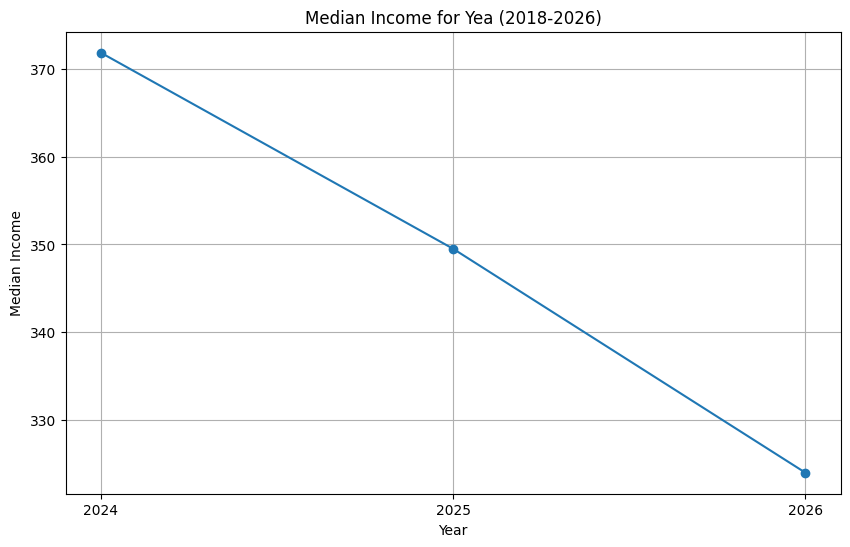

In [76]:
suburb = 'Bendigo'
subset = df_new[df_new.Suburb == suburb]
years = list(range(2018, 2027))
rent_predictions = subset[[f'{year}_predicted_rent' for year in ['2024', '2025', '2026']]].values.flatten()

plt.figure(figsize=(10, 6))
plt.plot(['2024', '2025', '2026'], rent_predictions, marker='o')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title(f'Median Income for {label} (2018-2026)')
plt.grid(True)
plt.show()

#### To do
Impute 2021 population data for smoother growth

Try to work out why some suburbs are predicted to decline in rent price

Add data features (supermarkets, average number_bedrooms for each suburb, etc.)

Experiment with stronger models ? (if needed)